In [11]:
import sqlite3 as sql
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import yaml
import subprocess
import os

import runMops
import MopsAnalysis
import MopsReader
import MopsPlotter
from MopsTracker import MopsTracker
from MopsParameters import MopsParameters
from MopsResults import MopsResults
import MopsDatabase
import MopsPlotter

from functools import reduce
% matplotlib inline

In [2]:
dataDrive = "/Volumes/DataCenter/"
dataLocation = "neosimData/jpl/oc28-30EditedSSMIDs.txt"

In [3]:
# default
subsampleLocation_default = "neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/"
runLocation_default = dataDrive + subsampleLocation_default
parameters_default = MopsParameters.fromYaml(runLocation_default + "parameters.yaml")
tracker_default = MopsTracker.fromYaml(runLocation_default + "tracker.yaml")
results_default = MopsResults.fromYaml(runLocation_default + "results.yaml")
con_default = sql.connect(tracker_default.mainDatabase)
window_dbs_default = MopsDatabase.attachDatabases(con_default, tracker_default.windowDatabases)

# 0.1 Err
subsampleLocation_01Err = "neosimData/jpl_2016_05_05_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50_chiPrint_01xErr/"
runLocation_01Err = dataDrive + subsampleLocation_01Err
parameters_01Err = MopsParameters.fromYaml(runLocation_01Err + "parameters.yaml")
tracker_01Err = MopsTracker.fromYaml(runLocation_01Err + "tracker.yaml")
results_01Err = MopsResults.fromYaml(runLocation_01Err + "results.yaml")
con_01Err = sql.connect(runLocation_01Err + "/results/main.db")
window_dbs_01Err = MopsDatabase.attachDatabases(con_01Err, tracker_01Err.windowDatabases)

# 10 Err
subsampleLocation_10Err = "neosimData/jpl_2016_05_04_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50_chiPrint_10xErr/"
runLocation_10Err = dataDrive + subsampleLocation_10Err
parameters_10Err = MopsParameters.fromYaml(runLocation_10Err + "parameters.yaml")
tracker_10Err = MopsTracker.fromYaml(runLocation_10Err + "tracker.yaml")
results_10Err = MopsResults.fromYaml(runLocation_10Err + "results.yaml")
con_10Err = sql.connect(tracker_10Err.mainDatabase)
window_dbs_10Err = MopsDatabase.attachDatabases(con_10Err, tracker_10Err.windowDatabases)

# 100 Err
subsampleLocation_100Err = "neosimData/jpl_2016_05_06_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50_chiPrint_100xErr/"
runLocation_100Err = dataDrive + subsampleLocation_100Err
parameters_100Err = MopsParameters.fromYaml(runLocation_100Err + "parameters.yaml")
tracker_100Err = MopsTracker.fromYaml(runLocation_100Err + "tracker.yaml")
results_100Err = MopsResults.fromYaml(runLocation_100Err + "results.yaml")
con_100Err = sql.connect(tracker_100Err.mainDatabase)
window_dbs_100Err = MopsDatabase.attachDatabases(con_100Err, tracker_100Err.windowDatabases)

Loading parameters from /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/parameters.yaml
Loading tracker from /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/tracker.yaml
Loading results from /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results.yaml
Proceeding with the first 10 databases...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52391-52406.db to con as db0...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52392-52406.db to con as db1...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52393-52408.db to con as db2...
Attaching /Volumes/DataCenter/neosimData/jpl_2016_04_28_chiProb00_maxRMS005_trackAdd05_detErr0034_accel50/results/52394-5240

In [7]:
MopsDatabase.results(con_01Err)

Completeness:                  0.852309694209
Findable Objects:              3074
Found Objects:                 2620
Missed Objects:                496

findTracklets Efficiency:      0.89608614353
True Tracklets:                69487
False Tracklets:               8058
Total Tracklets:               77545

collapsedTracklets Efficiency: 0.984145439171
True Collapsed Tracklets:      9311
False Collapsed Tracklets:     150
Total Collapsed Tracklets:     9461

purifyTracklets Efficiency:    0.0731707317073
True Purified Tracklets:       3
False Purified Tracklets:      38
Total Purified Tracklets:      41

linkTracklets Efficiency:      0.881624131205
True Tracks:                   64184
False Tracks:                  8618
Total Tracks:                  72802


In [8]:
MopsDatabase.results(con_default)

Completeness:                  0.965191932336
Findable Objects:              3074
Found Objects:                 2967
Missed Objects:                162

findTracklets Efficiency:      0.89608614353
True Tracklets:                69487
False Tracklets:               8058
Total Tracklets:               77545

collapsedTracklets Efficiency: 0.984145439171
True Collapsed Tracklets:      9311
False Collapsed Tracklets:     150
Total Collapsed Tracklets:     9461

purifyTracklets Efficiency:    0.0731707317073
True Purified Tracklets:       3
False Purified Tracklets:      38
Total Purified Tracklets:      41

linkTracklets Efficiency:      0.102638471669
True Tracks:                   90168
False Tracks:                  788333
Total Tracks:                  878501


In [9]:
MopsDatabase.results(con_10Err)

Completeness:                  0.967143786597
Findable Objects:              3074
Found Objects:                 2973
Missed Objects:                156

findTracklets Efficiency:      0.89608614353
True Tracklets:                69487
False Tracklets:               8058
Total Tracklets:               77545

collapsedTracklets Efficiency: 0.984145439171
True Collapsed Tracklets:      9311
False Collapsed Tracklets:     150
Total Collapsed Tracklets:     9461

purifyTracklets Efficiency:    0.0731707317073
True Purified Tracklets:       3
False Purified Tracklets:      38
Total Purified Tracklets:      41

linkTracklets Efficiency:      0.0420652950405
True Tracks:                   91565
False Tracks:                  2085170
Total Tracks:                  2176735


In [10]:
MopsDatabase.results(con_100Err)

Completeness:                  0.967143786597
Findable Objects:              3074
Found Objects:                 2973
Missed Objects:                156

findTracklets Efficiency:      0.89608614353
True Tracklets:                69487
False Tracklets:               8058
Total Tracklets:               77545

collapsedTracklets Efficiency: 0.984145439171
True Collapsed Tracklets:      9311
False Collapsed Tracklets:     150
Total Collapsed Tracklets:     9461

purifyTracklets Efficiency:    0.0731707317073
True Purified Tracklets:       3
False Purified Tracklets:      38
Total Purified Tracklets:      41

linkTracklets Efficiency:      0.0341717088686
True Tracks:                   91706
False Tracks:                  2591976
Total Tracks:                  2683682


In [37]:
def readChiSquaredProbability(trackFile, windowDatabase, con):
    fileIn = open(trackFile + ".out","r")
    
    ra_chi = []
    dec_chi = []
    
    for line in fileIn:
        elements = line.split(" ")
        if len(elements) == 2:
            array = np.fromstring(line, sep=" ", dtype=float)
            dec_chi.append(array[0])
            ra_chi.append(array[1])

    tracks = pd.read_sql("SELECT trackId, linkedObjectId FROM %s.AllTracks" % windowDatabase, con)

    false_tracks_chi_prob_ra = []
    false_tracks_chi_prob_dec = []
    true_tracks_chi_prob_ra = []
    true_tracks_chi_prob_dec = []
    true_tracks_chi_objects = []

    for i, t in enumerate(tracks.itertuples()):
        if t[2] == -1:
            false_tracks_chi_prob_ra.append(ra_chi[i])
            false_tracks_chi_prob_dec.append(dec_chi[i])
        else:
            true_tracks_chi_prob_ra.append(ra_chi[i])
            true_tracks_chi_prob_dec.append(dec_chi[i])
            true_tracks_chi_objects.append(t[2])

    false_tracks_chi_prob_ra = np.array(false_tracks_chi_prob_ra)
    false_tracks_chi_prob_dec = np.array(false_tracks_chi_prob_dec)
    true_tracks_chi_prob_ra = np.array(true_tracks_chi_prob_ra)
    true_tracks_chi_prob_dec = np.array(true_tracks_chi_prob_dec)
    true_tracks_chi_objects = np.array(true_tracks_chi_objects)
    
    return true_tracks_chi_objects, true_tracks_chi_prob_ra, true_tracks_chi_prob_dec, false_tracks_chi_prob_ra, false_tracks_chi_prob_dec

In [242]:
def plotChiSquaredDistribution(trackFile, con, windowDatabase, plotLog=False, saveAs=None, p1=0.000001, p2=0.1, sampleSize=10, ax=None, ax2=None):

    if ax == None:
        fig, ax = plt.subplots(1,3)
        fig.set_size_inches(15, 5)
    
    ax[0].set(adjustable='box-forced')
    ax[1].set(adjustable='box-forced')
    ax[2].set(adjustable='box-forced')
    
    true_tracks_chi_objects, true_tracks_chi_prob_ra, true_tracks_chi_prob_dec, false_tracks_chi_prob_ra, false_tracks_chi_prob_dec = readChiSquaredProbability(trackFile, windowDatabase, con)
    
    ax[2].scatter(true_tracks_chi_prob_ra, true_tracks_chi_prob_dec, c="b", label="True Tracks: %s" % len(true_tracks_chi_prob_ra), s=10)
    ax[2].scatter(false_tracks_chi_prob_ra, false_tracks_chi_prob_dec, c="r", label="False Tracks: %s" % len(false_tracks_chi_prob_ra), s=10)

    if plotLog:
        false_tracks_chi_prob_ra = np.log10(false_tracks_chi_prob_ra[(false_tracks_chi_prob_ra > p1) & (false_tracks_chi_prob_ra < p2)])
        false_tracks_chi_prob_dec = np.log10(false_tracks_chi_prob_dec[(false_tracks_chi_prob_dec > p1) & (false_tracks_chi_prob_dec < p2)])
        true_tracks_chi_prob_ra = np.log10(true_tracks_chi_prob_ra[(true_tracks_chi_prob_ra > p1) & (true_tracks_chi_prob_ra < p2)])
        true_tracks_chi_prob_dec = np.log10(true_tracks_chi_prob_dec[(true_tracks_chi_prob_dec > p1) & (true_tracks_chi_prob_dec < p2)])
        ax[0].hist([true_tracks_chi_prob_ra, false_tracks_chi_prob_ra],color=["b","r"])
        ax[1].hist([true_tracks_chi_prob_dec, false_tracks_chi_prob_dec],color=["b","r"])
        ax[0].set_xlabel(r"$log(P({\chi}^2))$ Ra for (%s < $P({\chi}^2)$ < %s)" % (p1,p2))
        ax[0].set_ylabel("Number of Tracks")
        ax[1].set_xlabel(r"$log(P({\chi}^2))$ Dec for (%s < $P({\chi}^2)$ < %s)"  % (p1,p2))
        ax[2].set_xlabel(r"$P({\chi}^2)$ Ra")
        ax[2].set_ylabel(r"$P({\chi}^2)$ Dec")
        ax[2].legend()        
    else:
        ax[0].hist([true_tracks_chi_prob_ra,false_tracks_chi_prob_ra],color=["b","r"])
        ax[1].hist([true_tracks_chi_prob_dec,false_tracks_chi_prob_dec],color=["b","r"])
        ax[0].set_xlabel(r"$P({\chi}^2)$ Ra")
        ax[0].set_ylabel("Number of Tracks")
        ax[1].set_xlabel(r"$P({\chi}^2)$ Dec")
        ax[2].set_xlabel(r"$P({\chi}^2)$ Ra")
        ax[2].set_ylabel(r"$P({\chi}^2)$ Dec")
        ax[2].legend()
        
    #if saveAs is not None:
    #    fig.savefig(saveAs)
        
    a = true_tracks_chi_prob_ra
    b = true_tracks_chi_prob_dec
    c = true_tracks_chi_objects
        
    goodfits = np.unique(c[np.where((a > 0.9) & (b > 0.9))])
    badfits = np.unique(c[np.where((a < 0.1) & (b < 0.1))])
    goodRaBadDec = np.unique(c[np.where((a > 0.9) & (b < 0.1))])
    badRaGoodDec = np.unique(c[np.where((a < 0.1) & (b > 0.9))])
    bothfits = np.unique(np.intersect1d(goodfits,badfits))
    bothfits_all = np.unique(reduce(np.intersect1d, (goodfits,badfits,badRaGoodDec,goodRaBadDec)))

    shared_sums = (len(bothfits), 0, 0, len(bothfits))
    shared_sums_all = (len(bothfits_all), len(bothfits_all), len(bothfits_all), len(bothfits_all))

    n_groups = 4

    sums = (len(goodfits), len(goodRaBadDec), len(badRaGoodDec), len(badfits))

    if ax2 == None:
        fig2, ax2 = plt.subplots(1,1)

    index = np.arange(n_groups)
    bar_width = 0.75
    
    rects1 = ax2.bar(index + 0.08, sums, bar_width, color="b", alpha=0.4)
    rects2 = ax2.bar(index + 0.08, shared_sums, bar_width, color="b", alpha=0.6)
    rects3 = ax2.bar(index + 0.08, shared_sums_all, bar_width, color="b")

    ax2.set_xlabel('Track Quality')
    ax2.set_ylabel('Number of Unique Objects')
    ax2.set_xticks(index + 0.5*bar_width)
    ax2.set_xticklabels(["$P({\chi}^2)$ Ra > 0.9 \n $P({\chi}^2)$ Dec > 0.9", "$P({\chi}^2)$ Ra > 0.9 \n $P({\chi}^2)$ Dec < 0.1", "$P({\chi}^2)$ Ra < 0.1 \n $P({\chi}^2)$ Dec > 0.9", "$P({\chi}^2)$ Ra < 0.1 \n $P({\chi}^2)$ Dec < 0.1"],size=9)
        
    return

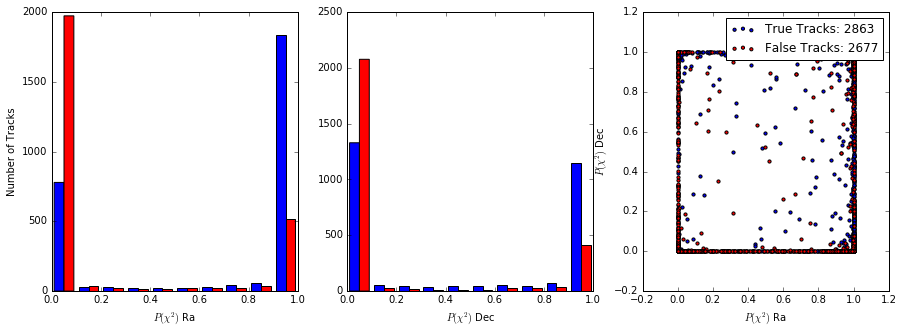

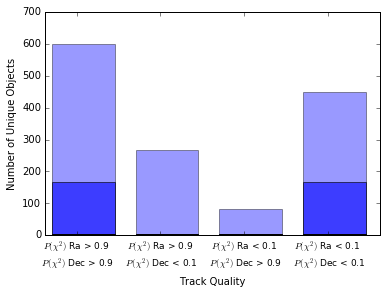

In [243]:
plotChiSquaredDistribution(tracker_default.tracks[0], con_default, window_dbs_default[0], saveAs="trackSummary.png")

In [248]:
def plotWindow(num):
    fig, ax = plt.subplots(4,3)
    fig.set_size_inches(15,20)
    fig.suptitle("Changing Default Astrometric Error (15 Day Window)", x=0.5, y=0.95, size=18)
    fig.subplots_adjust(left=None, bottom=None, right=0.83, top=None, wspace=0.3, hspace=0.3)
    fig2, ax2 = plt.subplots(4,1)
    fig2.set_size_inches(8, 20)
    fig2.subplots_adjust(left=None, bottom=None, right=0.65, top=None, wspace=0.2, hspace=0.3)
    fig2.suptitle("Object Distribution in True Tracks", y=0.94, size=18)
    for i, (tracks, con, windowDatabase) in enumerate(zip([tracker_01Err.tracks[num], tracker_default.tracks[num], tracker_10Err.tracks[num], tracker_100Err.tracks[num]],[con_01Err, con_default, con_10Err, con_100Err], [window_dbs_01Err[num], window_dbs_default[num], window_dbs_10Err[num], window_dbs_100Err[num]])):
        plotChiSquaredDistribution(tracks, con, windowDatabase, ax=ax[i], ax2=ax2[i])
        
    ax[0][2].text(1.3, 0.2, "Astrometric Error: 0.02 / 3600\n\n"
                            "Completeness:        0.8523\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2620\n"
                            "Missed Objects:      496\n"
                            "Linkage Efficiency:  0.8816\n"
                            "True Tracks:          64184\n"
                            "False Tracks:         8618\n"
                            "Total Tracks:         72802\n")
    ax[1][2].text(1.3, 0.2, "Astrometric Error: 0.2 / 3600\n\n"
                            "Completeness:        0.9652\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2967\n"
                            "Missed Objects:      162\n"
                            "Linkage Efficiency:  0.1026\n"
                            "True Tracks:          90168\n"
                            "False Tracks:         788333\n"
                            "Total Tracks:         878501\n")
    ax[2][2].text(1.3, 0.2, "Astrometric Error: 2.0 / 3600\n\n"
                            "Completeness:        0.9671\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2973\n"
                            "Missed Objects:      156\n"
                            "Linkage Efficiency:  0.0421\n"
                            "True Tracks:          91565\n"
                            "False Tracks:         2085170\n"
                            "Total Tracks:         2176735\n")
    ax[3][2].text(1.3, 0.2, "Astrometric Error: 20.0 / 3600\n\n"
                            "Completeness:        0.9671\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2973\n"
                            "Missed Objects:      156\n"
                            "Linkage Efficiency:  0.0342\n"
                            "True Tracks:          91706\n"
                            "False Tracks:         2591976\n"
                            "Total Tracks:         2683682\n")
    
    ax2[0].text(4.3, 0.7, "Astrometric Error: 0.02 / 3600\n\n"
                            "Completeness:        0.8523\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2620\n"
                            "Missed Objects:      496\n"
                            "Linkage Efficiency:  0.8816\n"
                            "True Tracks:          64184\n"
                            "False Tracks:         8618\n"
                            "Total Tracks:         72802\n")
    ax2[1].text(4.3, 0.7, "Astrometric Error: 0.2 / 3600\n\n"
                            "Completeness:        0.9652\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2967\n"
                            "Missed Objects:      162\n"
                            "Linkage Efficiency:  0.1026\n"
                            "True Tracks:          90168\n"
                            "False Tracks:         788333\n"
                            "Total Tracks:         878501\n")
    ax2[2].text(4.3, 0.7, "Astrometric Error: 2.0 / 3600\n\n"
                            "Completeness:        0.9671\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2973\n"
                            "Missed Objects:      156\n"
                            "Linkage Efficiency:  0.0421\n"
                            "True Tracks:          91565\n"
                            "False Tracks:         2085170\n"
                            "Total Tracks:         2176735\n")
    ax2[3].text(4.3, 0.7, "Astrometric Error: 20.0 / 3600\n\n"
                            "Completeness:        0.9671\n"
                            "Findable Objects:   3074\n"
                            "Found Objects:       2973\n"
                            "Missed Objects:      156\n"
                            "Linkage Efficiency:  0.0342\n"
                            "True Tracks:          91706\n"
                            "False Tracks:         2591976\n"
                            "Total Tracks:         2683682\n")
    
    fig.savefig("astromErr%s.png" % num, dpi=200)
    fig2.savefig("astromErrTrackDistrib%s.png" % num, dpi=200)

/Users/joachim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


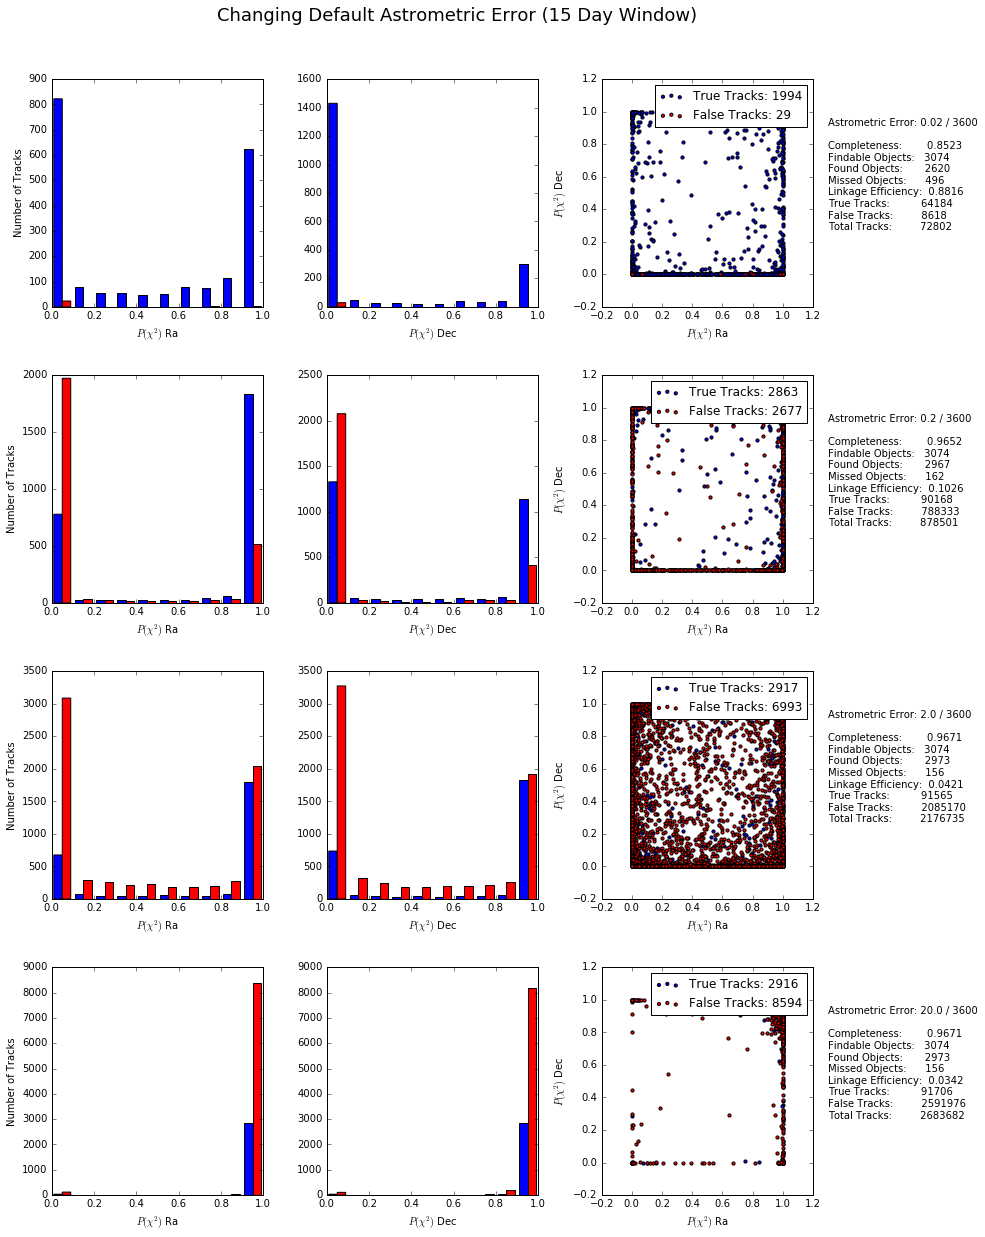

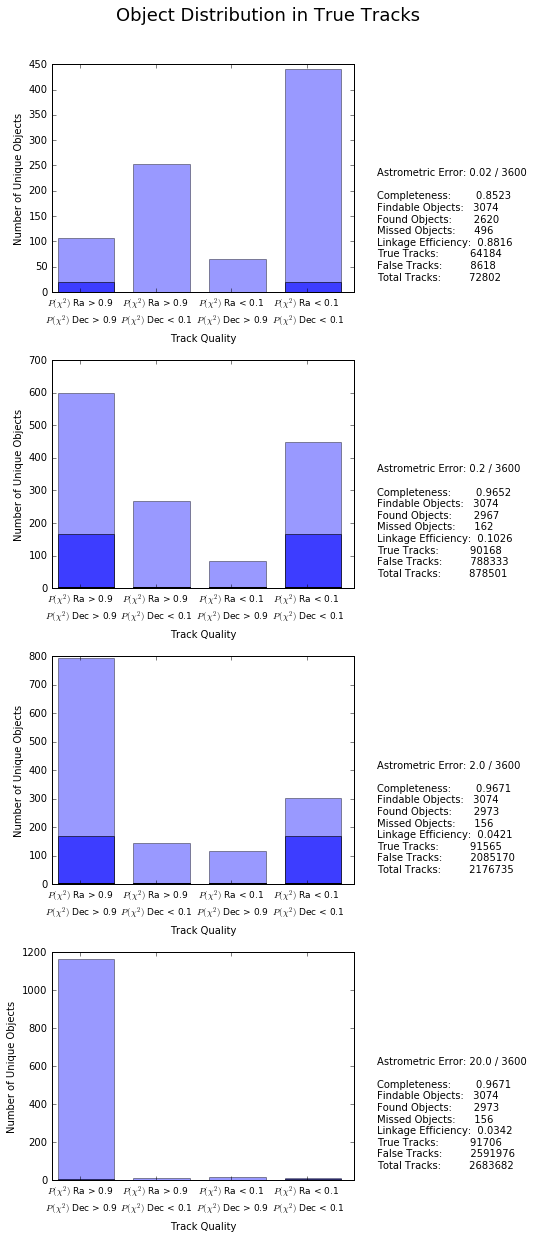

In [249]:
plotWindow(0)

/Users/joachim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


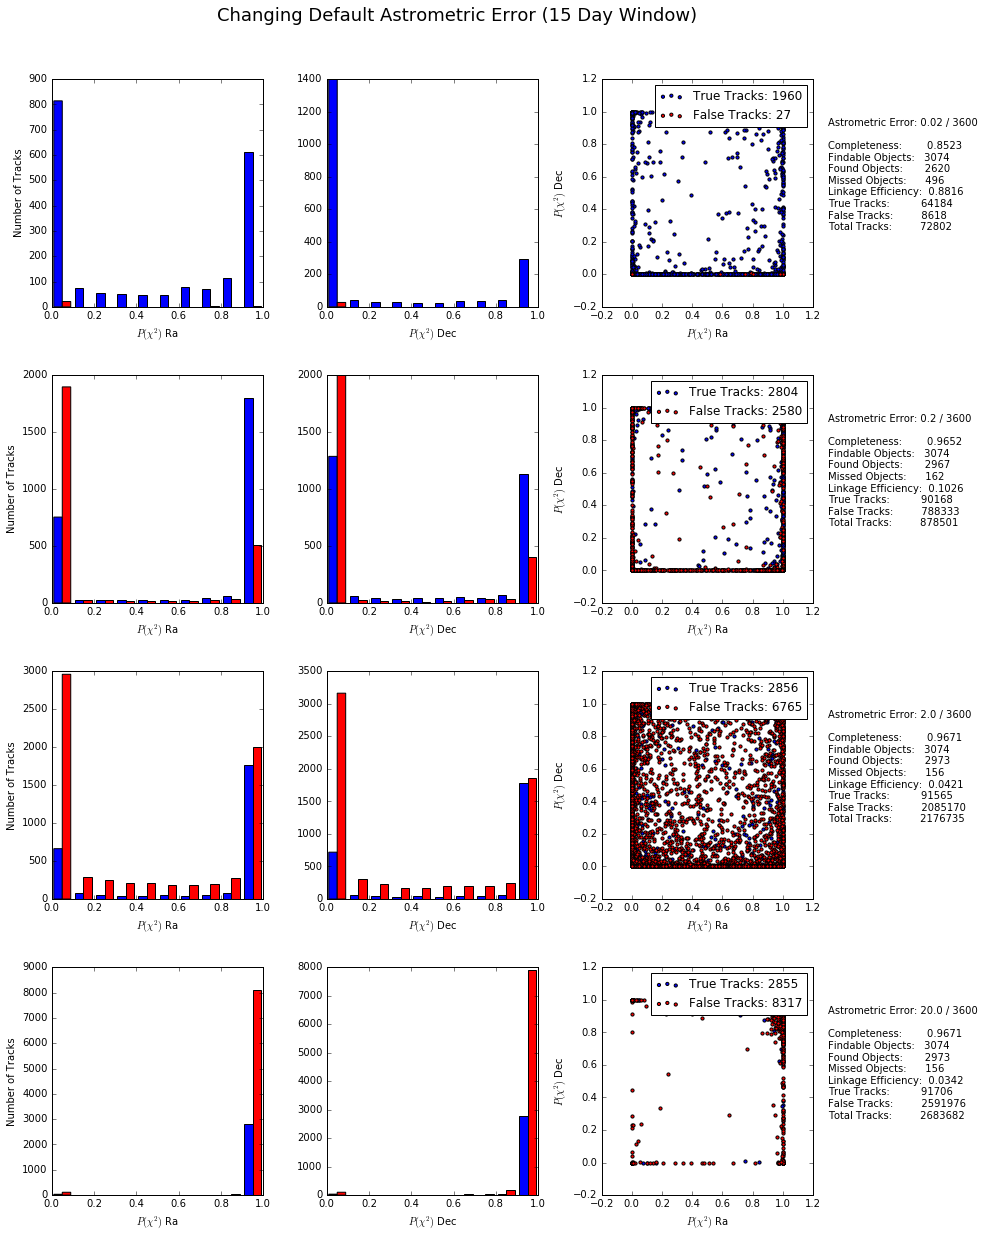

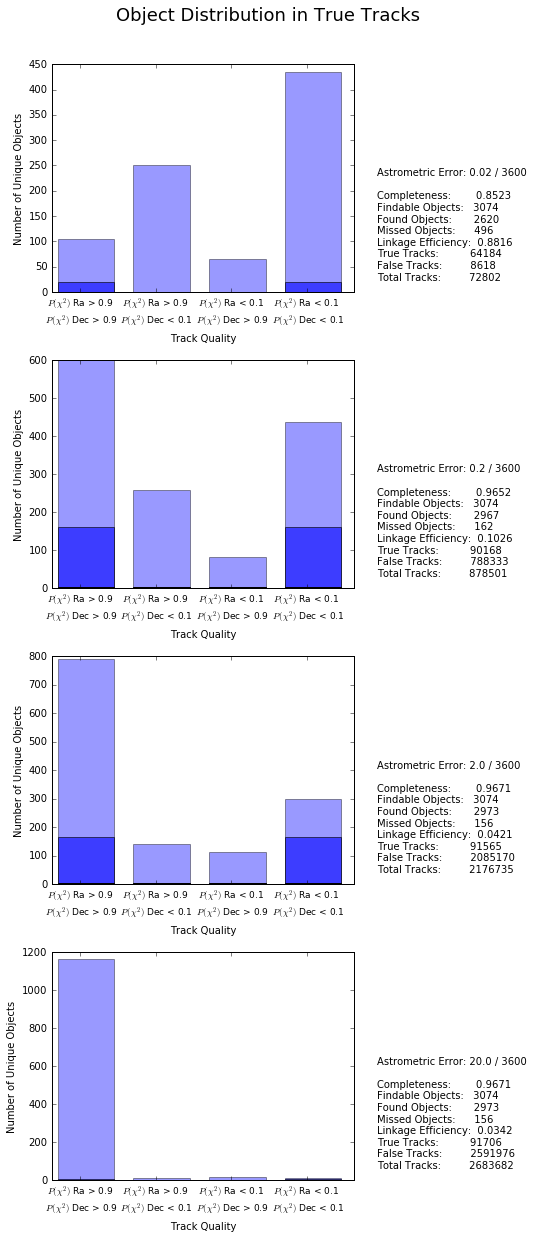

In [250]:
plotWindow(1)

/Users/joachim/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  app.launch_new_instance()


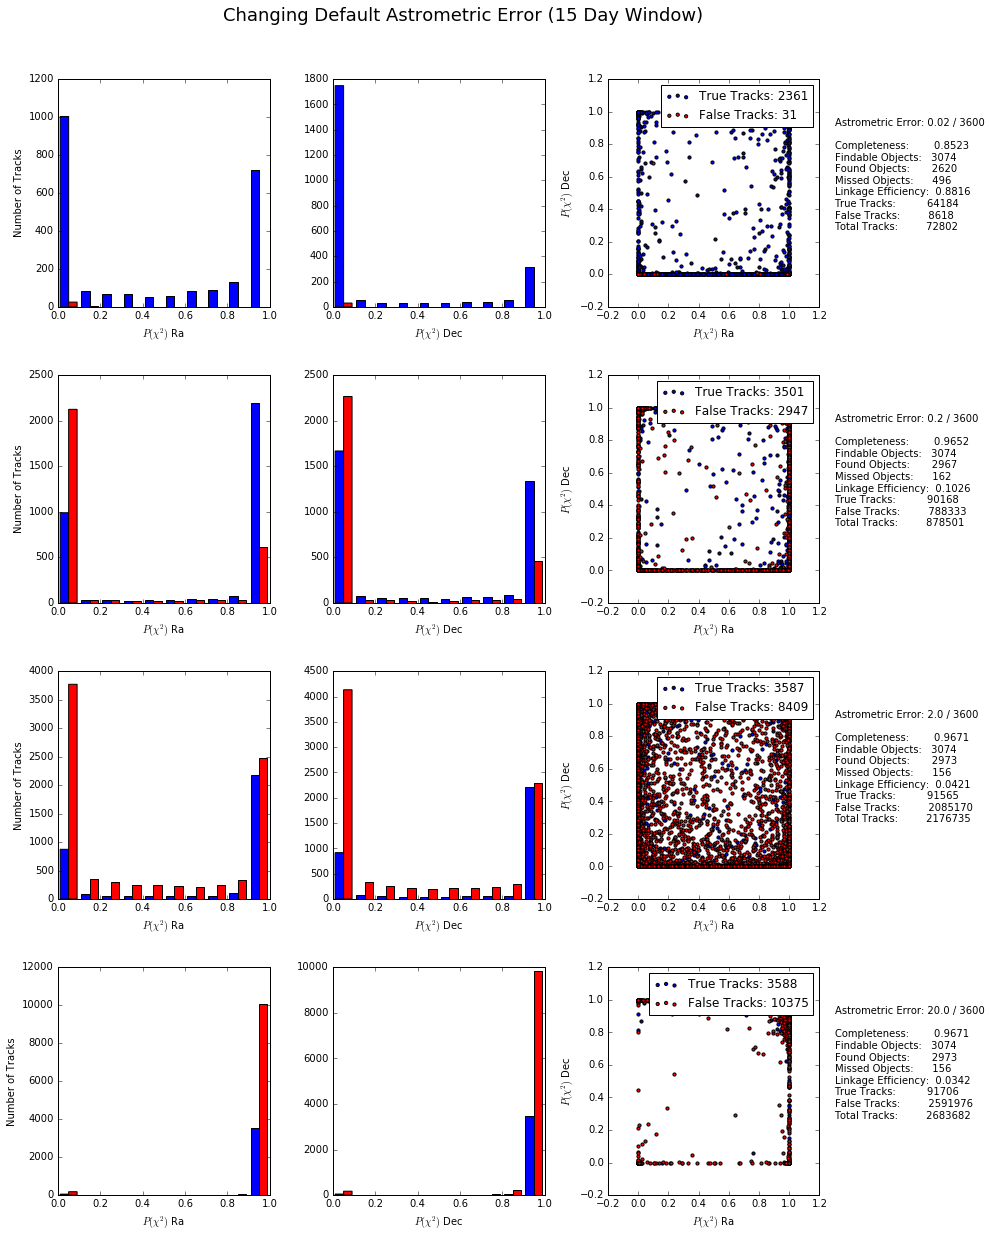

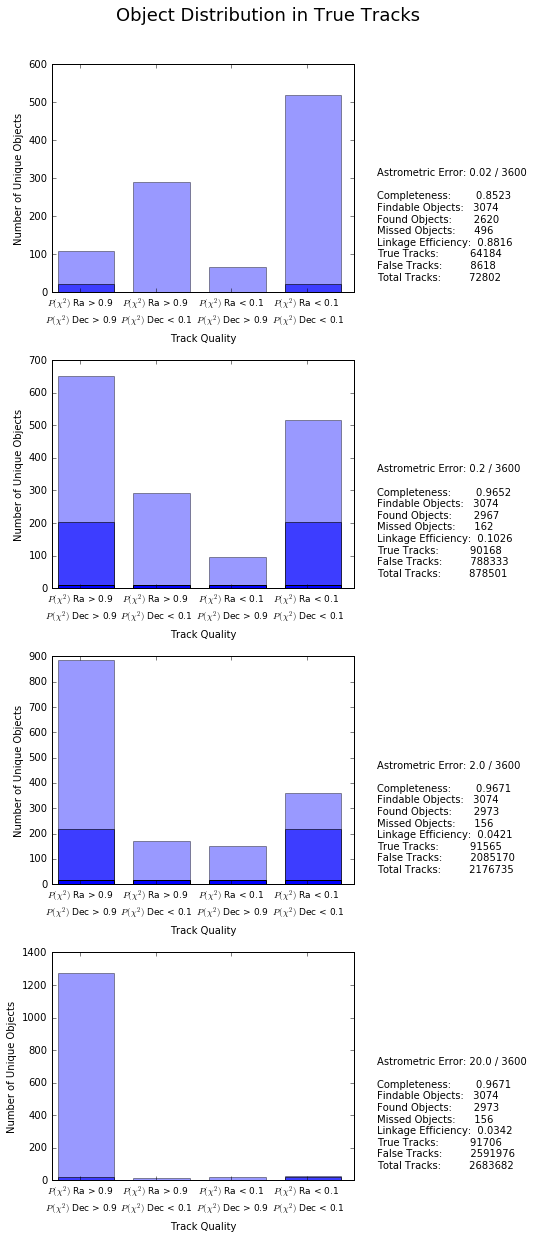

In [251]:
plotWindow(2)